In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
data.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64

In [4]:
data.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# calcular correlação dos dados numericos
correl = data.corr()

<AxesSubplot:>

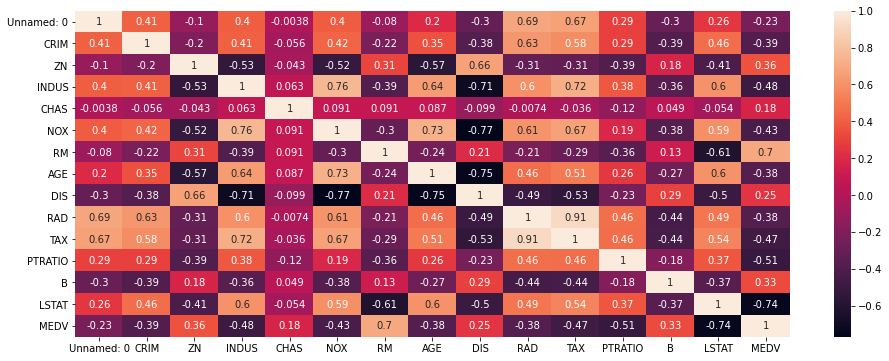

In [6]:
# Usando o metodo heatmap do seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correl, annot=True)

# Visualizando a relação entre algumas features e variavel alvo

In [10]:
import plotly.express as px

In [13]:
# RM x MEDV (Numero de quartos e valor medio do imovel)
fig = px.scatter(data, x=data.RM, y=data.MEDV)
fig.show()

In [14]:
# LSTAT x MEDV (indice de status mais baixo da população e preço de imovel)
fig = px.scatter(data, x=data.LSTAT, y=data.MEDV)
fig.show()

In [15]:
# PTRATIO x MEDV (percentual de proporção de alunos para professorese valor médio de imovel)
fig = px.scatter(data, x=data.PTRATIO, y=data.MEDV)
fig.show()

## Analisando Outliers

In [19]:
# Para visualizar a estatistica descritiva de uma variavel
data.RM.describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [24]:
# visualizando a distribuição da variável RM
import plotly.figure_factory as ff
labels = ['Ditribuição da variavel RM (Numero de quartos)']
fig = ff.create_distplot([data.RM], labels, bin_size=.2)
fig.show()

In [27]:
# Visualizando outliers na variavel RM
import plotly.express as px

fig = px.box(data, y='RM')
fig.update_layout(width= 800, height= 800)
fig.show()

### Visualizando a distribução da variavel MEDV

In [28]:
data.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [34]:
# Distribuição

labels = ['Distribuição da variável MEDV (preço médio do imóvel)']
fig = ff.create_distplot([data.MEDV], labels, bin_size=.2)
fig.show()

> Podemos perceber uma calda grande à direita, ou seja a distribuição dos dados tende a ter um viés com asimetria positiva

### Analisando a simetria do dado

In [36]:
from scipy import stats

In [37]:
# imprime o coeficiente de pearson
stats.skew(data.MEDV)

1.104810822864635

### COeficiente de pearson

* Valor entre -1 e 1 - distribuição simétrica
* Valor maior que 1 - distribuição assimetrica positiva
* Valor menor que -1 - distribuição assimetrica negativa.

In [39]:
# histograma da variavel MEDV (variavel alvo)
fig = px.histogram(data, x='MEDV', nbins=50, opacity=0.50)
fig.show()

In [40]:
# Visualizando outliers na variavel MEDV
import plotly.express as px

fig = px.box(data, y='MEDV')
fig.update_layout(width= 800, height= 800)
fig.show()

In [41]:
# IMprimindo 16 maiores valores MEDV em comparação com outras variaveis
data[['RM', 'LSTAT', 'PTRATIO', 'MEDV']].nlargest(16, 'MEDV')

,RM,LSTAT,PTRATIO,MEDV
161,7.489,1.73,14.7,50.0
162,7.802,1.92,14.7,50.0
163,8.375,3.32,14.7,50.0
166,7.929,3.70,14.7,50.0
186,7.831,4.45,17.8,50.0
195,7.875,2.97,14.4,50.0
204,8.034,2.88,14.7,50.0
225,8.725,4.63,17.4,50.0
257,8.704,5.12,13.0,50.0
267,8.297,7.44,13.0,50.0


In [42]:
# filtra somente os top 16 da coluna MEDV
top16 = data.nlargest(16, 'MEDV').index

In [43]:
# Remove os valores listados em top16 (outliers)
data.drop(top16, inplace=True)

In [44]:
# visualizando a distribuição de MEDV novamente e sem outliers
labels = ['Distribuição da variável MEDV (preço médio do imóvel)']
fig = ff.create_distplot([data.MEDV], labels, bin_size=.2)
fig.show()

In [45]:
# histograma da variavel MEDV (variavel alvo) / Sem outliers
fig = px.histogram(data, x='MEDV', nbins=50, opacity=0.50)
fig.show()

In [46]:
# Imprimindo o coeficiente de pearson para verificar novamente a inclinação da distribuição
stats.skew(data.MEDV)

0.7732836030909053

> Conforme vemos acima a distribuição deixou de ser assimetrica

# Definindo um baseline

### A baseline é importante para ter marcos no projeto.

### Permite uma fácil explicação para o stackholders

### É algo que sempre tentaremos ganhar na medida do possivel.


In [47]:
# Convertendo os dados
data.RM = data.RM.astype(int)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  490 non-null    int64  
 1   CRIM        490 non-null    float64
 2   ZN          490 non-null    float64
 3   INDUS       490 non-null    float64
 4   CHAS        490 non-null    float64
 5   NOX         490 non-null    float64
 6   RM          490 non-null    int32  
 7   AGE         490 non-null    float64
 8   DIS         490 non-null    float64
 9   RAD         490 non-null    float64
 10  TAX         490 non-null    float64
 11  PTRATIO     490 non-null    float64
 12  B           490 non-null    float64
 13  LSTAT       490 non-null    float64
 14  MEDV        490 non-null    float64
dtypes: float64(13), int32(1), int64(1)
memory usage: 79.3 KB


In [49]:
# definindo a regra para categorizar os dados
categorias = []

#### Se o numero de quertos for menor ou igual a 4 será considerado imóvel pequeno, caso seja menor que 7 será considerado médio, se não será grande.
> Populando a lista de categorias:

In [50]:
for i in data.RM.iteritems():

    valor = (i[1])
    if valor <=4:
        categorias.append('Pequeno')
    elif valor < 7:
        categorias.append('Médio')
    else:
        categorias.append('Grande')

In [51]:
# imprimindo categorias
categorias

['Médio',
 'Médio',
 'Grande',
 'Médio',
 'Grande',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Grande',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Grande',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Grande',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Grande',
 'Grande',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Grande',
 'Grande',
 

In [52]:
data['categorias'] = categorias

In [53]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,categorias
0,0,0.00632,18.0,2.31,0.0,0.538,6,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,Médio
1,1,0.02731,0.0,7.07,0.0,0.469,6,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,Médio
2,2,0.02729,0.0,7.07,0.0,0.469,7,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,Grande
3,3,0.03237,0.0,2.18,0.0,0.458,6,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,Médio
4,4,0.06905,0.0,2.18,0.0,0.458,7,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,Grande


In [54]:
# agrupa as categorias e calcula as medias
medias_categorias = data.groupby(by='categorias')['MEDV'].mean()

In [55]:
# imprime variavel
medias_categorias

categorias
Grande     35.719231
Médio      20.130425
Pequeno    14.921429
Name: MEDV, dtype: float64

In [57]:
# criando um dicionario com chaves de categoria
dict_baseline = dict(medias_categorias)

In [58]:
dict_baseline

{'Grande': 35.71923076923077,
 'Médio': 20.1304245283019,
 'Pequeno': 14.921428571428574}

In [63]:
# criando função para retornar o baseline
def return_baseline(num_quartos):
    if num_quartos <= 4:
        return dict_baseline.get('Pequeno')
    elif num_quartos < 7:
        return dict_baseline.get('Médio')
    else:
        return dict_baseline.get('Grande')

In [60]:
# chamando a função para retornar o baseline
return_baseline(3)

14.921428571428574

In [64]:
# iterando sobre os imoveis e imprimindo o valor médio pelo numero de quartos
for i in data.RM.iteritems():
    n_quartos = i[1]
    print('O numero de quartos é: {}, valor médio: {}'.format(n_quartos, return_baseline(n_quartos)))

ro de quartos é: 5, valor médio: 20.1304245283019
O numero de quartos é: 6, valor médio: 20.1304245283019
O numero de quartos é: 5, valor médio: 20.1304245283019
O numero de quartos é: 6, valor médio: 20.1304245283019
O numero de quartos é: 5, valor médio: 20.1304245283019
O numero de quartos é: 6, valor médio: 20.1304245283019
O numero de quartos é: 6, valor médio: 20.1304245283019
O numero de quartos é: 5, valor médio: 20.1304245283019
O numero de quartos é: 5, valor médio: 20.1304245283019
O numero de quartos é: 5, valor médio: 20.1304245283019
O numero de quartos é: 4, valor médio: 14.921428571428574
O numero de quartos é: 6, valor médio: 20.1304245283019
O numero de quartos é: 5, valor médio: 20.1304245283019
O numero de quartos é: 4, valor médio: 14.921428571428574
O numero de quartos é: 5, valor médio: 20.1304245283019
O numero de quartos é: 5, valor médio: 20.1304245283019
O numero de quartos é: 6, valor médio: 20.1304245283019
O numero de quartos é: 5, valor médio: 20.13042452

In [65]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,categorias
0,0,0.00632,18.0,2.31,0.0,0.538,6,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,Médio
1,1,0.02731,0.0,7.07,0.0,0.469,6,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,Médio
2,2,0.02729,0.0,7.07,0.0,0.469,7,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,Grande
3,3,0.03237,0.0,2.18,0.0,0.458,6,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,Médio
4,4,0.06905,0.0,2.18,0.0,0.458,7,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,Grande
